Datos simulados: resultados de pruebas en dos regiones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Simulación de datos
n = 50

df = pd.DataFrame({
    "region": ["Region A"] * n + ["Region B"] * n,
    "puntaje": np.concatenate([
        np.random.normal(520, 40, n),   # Región A: más concentrada
        np.random.normal(520, 80, n)    # Región B: más dispersa
    ]),
    "edad": np.random.randint(14, 18, 2*n),
    "sexo": np.random.choice(["F", "M"], 2*n),
    "escuela": np.random.choice(["Municipal", "Subvencionada", "Privada"], 2*n)
})

df["puntaje"] = df["puntaje"].round(0)
df.head()

,region,puntaje,edad,sexo,escuela
0,Region A,540.0,14,M,Subvencionada
1,Region A,514.0,15,F,Municipal
2,Region A,546.0,14,F,Subvencionada
3,Region A,581.0,14,M,Municipal
4,Region A,511.0,16,F,Privada


Clasificación de variables (pregunta explícita de la consigna)

| Variable | Tipo                  |
| -------- | --------------------- |
| region   | Cualitativa nominal   |
| sexo     | Cualitativa nominal   |
| escuela  | Cualitativa nominal   |
| edad     | Cuantitativa discreta |
| puntaje  | Cuantitativa continua |


Tabla de frecuencia para los puntajes (por región)

In [2]:
bins = range(300, 801, 50)

tabla_frec = (
    pd.cut(df["puntaje"], bins=bins)
    .value_counts()
    .sort_index()
)

tabla_frec

,count
puntaje,
"(300, 350]",1
"(350, 400]",1
"(400, 450]",6
"(450, 500]",29
"(500, 550]",42
"(550, 600]",16
"(600, 650]",5
"(650, 700]",0
"(700, 750]",0


Medidas de tendencia central (por región)

In [3]:
resumen_central = df.groupby("region")["puntaje"].agg(
    media="mean",
    mediana="median",
    moda=lambda x: x.mode().iloc[0]
)

resumen_central.round(1)

,media,mediana,moda
region,,,
Region A,511.0,511.0,501.0
Region B,521.4,523.5,549.0


Medidas de dispersión (por región)

In [4]:
resumen_disp = df.groupby("region")["puntaje"].agg(
    rango=lambda x: x.max() - x.min(),
    varianza=lambda x: x.var(ddof=1),
    desv_std=lambda x: x.std(ddof=1)
)

resumen_disp.round(1)

,rango,varianza,desv_std
region,,,
Region A,152.0,1397.4,37.4
Region B,335.0,4891.9,69.9


Representación gráfica: histogramas

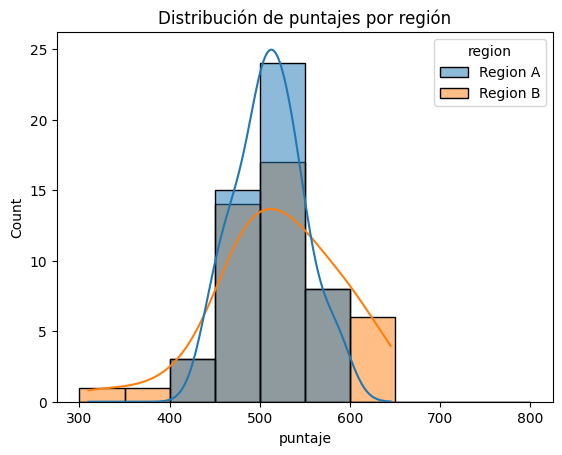

In [7]:
plt.figure()
sns.histplot(data=df, x="puntaje", hue="region", bins=bins, kde=True)
plt.title("Distribución de puntajes por región")
plt.show()

Boxplot (detección de outliers)

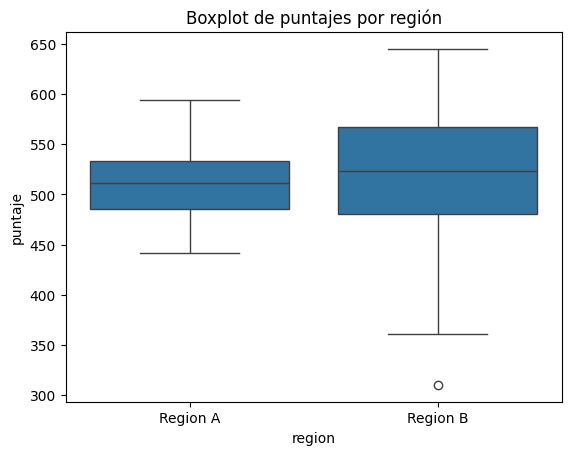

In [8]:
plt.figure()
sns.boxplot(data=df, x="region", y="puntaje")
plt.title("Boxplot de puntajes por región")
plt.show()